## GIỚI THIỆU

### MỤC TIÊU
Mục đích của nghiên cứu là để dẫn chứng cho các nội dung như nhận thức, quan điểm về tiêu chí đánh giá lựa chọn nhà thầu, yếu tố ảnh hưởng đến quyết định sở hữu căn hộ chung cư, tiêu chí lựa chọn diện tích sở hữu căn hộ, các tiện ích cũng như không gian thiết kế.

Nghiên cứu này sẽ phân tích dữ liệu và trả lời cho các câu hỏi:
1. Tiêu chí đánh giá lựa chọn nhà thầu
2. Yếu tố ảnh hưởng đến quyết định sở hữu căn hộ chung cư
3. Tiêu chí lựa chọn diện tích sở hữu căn hộ
4. Các tiện ích cũng như không gian thiết kế.

### DỮ LIỆU
Nguồn dữ liệu: Bảng kết quả khảo sát tại file `khao_sat_coteccons_200.csv`.

### PHÂN TÍCH

In this section, descriptive statistics and data visualization techniques will be employed to understand the data better. Statistical inference will also be used to test if the observed values are statistically significant. Some of the key metrics that will be computed include:1. 

Distributio2. ns
cou3. nts
relationship between spe4. cies
conservation status of sp5. ecies
observations of species in

### ĐÁNH GIÁ

 parks.nal.k

### HIỂN THỊ DỮ LIỆU TRONG BẢNG

In [1]:
# Import Python modules
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

from scipy.stats import chi2_contingency

from matplotlib.colors import ListedColormap, Normalize


In [2]:
apartment = pd.read_csv('khao_sat_coteccons_200.csv',encoding='utf-8')
apartment.head(10)

,Giới tính,Độ tuổi,Nghề nghiệp,Tình trạng hôn nhân,Thu nhập hàng tháng,Đã từng/sở hữu nhà chung cư,Lý do chọn sở hữu chung cư,Loại căn hộ muốn sở hữu,Nguồn thông tin về căn hộ,Mức độ hài lòng,Nhận xét
0,Nữ,Từ 30 – dưới 40 tuổi,Khác,Đã kết hôn,Trên 30 triệu,Chưa từng,Thi công an toàn,NaN,"Báo chí, truyền thông",Hài lòng,Khách hàng sẽ giới thiệu căn hộ
1,Nam,Từ 22 – dưới 30 tuổi,Nhân viên văn phòng,Độc thân,Từ 15-20 triệu,Đã từng,NaN,Căn hộ 1 phòng ngủ (40m2),"Báo chí, truyền thông",Hài lòng,Khách hàng có nhận xét tốt
2,Nam,Từ 22 – dưới 30 tuổi,Nhân viên văn phòng,Độc thân,Từ 20-30 triệu,Chưa từng,Bàn giao đúng tiến độ,NaN,"Báo chí, truyền thông",Trung lập,Khách hàng sẽ giới thiệu căn hộ
3,Nữ,Từ 30 – dưới 40 tuổi,Nhân viên văn phòng,Độc thân,Trên 30 triệu,Chưa từng,Thiết kế đẹp,NaN,"Báo chí, truyền thông",Hài lòng,Khách hàng có nhận xét tốt
4,Nam,Từ 22 – dưới 30 tuổi,Nhân viên văn phòng,Độc thân,Từ 10-15 triệu,Chưa từng,Uy tín doanh nghiệp,NaN,"Báo chí, truyền thông",Trung lập,Khách hàng sẽ giới thiệu căn hộ
5,Nữ,Từ 30 – dưới 40 tuổi,Nhân viên văn phòng,Độc thân,Từ 10-15 triệu,Chưa từng,Bàn giao đúng tiến độ,NaN,"Báo chí, truyền thông",Hài lòng,Khách hàng sẽ giới thiệu căn hộ
6,Nữ,Từ 22 – dưới 30 tuổi,Nội trợ,Độc thân,Từ 15-20 triệu,Chưa từng,Uy tín doanh nghiệp,NaN,"Báo chí, truyền thông",Không hài lòng,Khách hàng sẽ giới thiệu căn hộ
7,Nam,Từ 30 – dưới 40 tuổi,Nhân viên văn phòng,Độc thân,Từ 20-30 triệu,Chưa từng,Uy tín doanh nghiệp,NaN,"Báo chí, truyền thông",Rất hài lòng,Khách hàng sẽ giới thiệu căn hộ
8,Nam,Từ 30 – dưới 40 tuổi,Nội trợ,Đã kết hôn,Trên 30 triệu,Đã từng,NaN,Căn hộ 1 phòng ngủ (40m2),"Người thân, bạn bè, đồng nghiệp",Rất hài lòng,Khách hàng có ý định sở hữu
9,Nam,Trên 40 tuổi,Nhân viên văn phòng,Đã kết hôn,Từ 15-20 triệu,Chưa từng,Uy tín doanh nghiệp,NaN,"Báo chí, truyền thông",Rất hài lòng,Khách hàng sẽ giới thiệu căn hộ


In [3]:
print(apartment.columns)
print(apartment.dtypes)

Index(['Giới tính', 'Độ tuổi', 'Nghề nghiệp', 'Tình trạng hôn nhân',
       'Thu nhập hàng tháng', 'Đã từng/sở hữu nhà chung cư',
       'Lý do chọn sở hữu chung cư', 'Loại căn hộ muốn sở hữu',
       'Nguồn thông tin về căn hộ', 'Mức độ hài lòng', 'Nhận xét'],
      dtype='object')
Giới tính                      object
Độ tuổi                        object
Nghề nghiệp                    object
Tình trạng hôn nhân            object
Thu nhập hàng tháng            object
Đã từng/sở hữu nhà chung cư    object
Lý do chọn sở hữu chung cư     object
Loại căn hộ muốn sở hữu        object
Nguồn thông tin về căn hộ      object
Mức độ hài lòng                object
Nhận xét                       object
dtype: object


### KHÁM PHÁ DỮ LIỆU

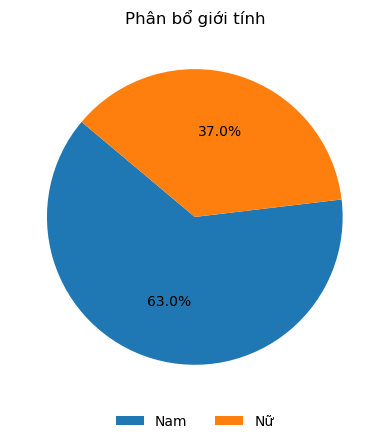

Nam: 126
Nữ: 74


In [4]:
# Data to plot
labels = apartment['Giới tính']
sizes = apartment['Giới tính'].value_counts()
explode = (0.1, 0)  # explode 1st slice

sizes.index = pd.CategoricalIndex(sizes.index, categories=[
    'Nam', 'Nữ'
], ordered=True)

sizes = sizes.sort_index()
labels = sizes.index

# Plot
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, autopct='%1.1f%%', startangle=140)

# Draw legend
plt.legend(wedges, labels, loc="upper center", bbox_to_anchor=(0.5, -0.0005), ncol=3, frameon=False)
plt.title('Phân bổ giới tính')
plt.savefig('01. pie_chart_gioi_tinh.png', format='png', dpi=300)  # You can change the format and dpi as needed
plt.show()

# Print quantities
for label, size in zip(sizes.index, sizes):
    print(f'{label}: {size}')

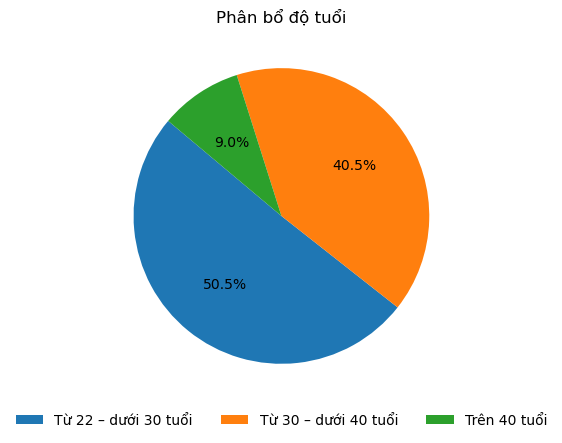

Từ 22 – dưới 30 tuổi: 101
Từ 30 – dưới 40 tuổi: 81
Trên 40 tuổi: 18


In [5]:
# Data to plot
labels = apartment['Độ tuổi']
sizes = apartment['Độ tuổi'].value_counts()
explode = (0.1, 0)  # explode 1st slice

sizes.index = pd.CategoricalIndex(sizes.index, categories=[
    'Từ 22 – dưới 30 tuổi', 'Từ 30 – dưới 40 tuổi', 'Trên 40 tuổi'
], ordered=True)

sizes = sizes.sort_index()
labels = sizes.index

# Plot
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, autopct='%1.1f%%', startangle=140)

# Draw legend
plt.legend(wedges, labels, loc="upper center", bbox_to_anchor=(0.5, -0.0005), ncol=3, frameon=False)
plt.title('Phân bổ độ tuổi')
plt.savefig('02. pie_chart_do_tuoi.png', format='png', dpi=300)  # You can change the format and dpi as needed
plt.show()

# Print quantities
for label, size in zip(sizes.index, sizes):
    print(f'{label}: {size}')

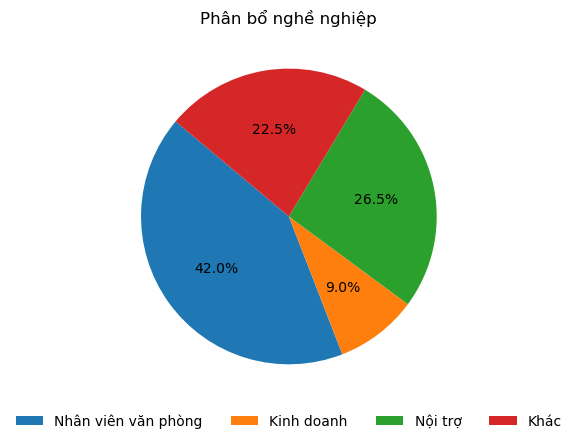

Nhân viên văn phòng: 84
Kinh doanh: 18
Nội trợ: 53
Khác: 45


In [6]:
# Data to plot
sizes = apartment['Nghề nghiệp'].value_counts()
sizes.index = pd.CategoricalIndex(sizes.index, categories=['Nhân viên văn phòng', 'Kinh doanh', 'Nội trợ', 'Khác'], ordered=True)
sizes = sizes.sort_index()
labels = sizes.index
explode = (0.1, 0)  # explode 1st slice

# Plot
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, autopct='%1.1f%%', startangle=140)

# Draw legend
plt.legend(wedges, labels, loc="upper center", bbox_to_anchor=(0.5, -0.0005), ncol=4, frameon=False)
plt.title('Phân bổ nghề nghiệp')
plt.savefig('03. pie_chart_nghe_nghiep.png', format='png', dpi=300)  # You can change the format and dpi as needed
plt.show()

# Print quantities
for label, size in zip(sizes.index, sizes):
    print(f'{label}: {size}')

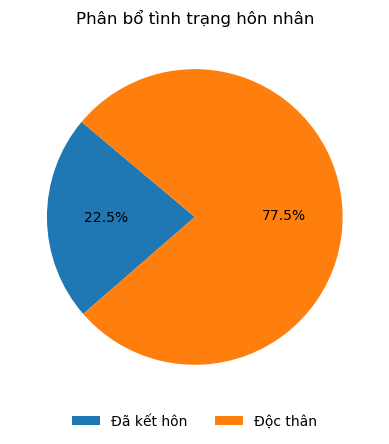

Đã kết hôn: 45
Độc thân: 155


In [7]:
# Data to plot
sizes = apartment['Tình trạng hôn nhân'].value_counts()
sizes.index = pd.CategoricalIndex(sizes.index, categories=['Đã kết hôn', 'Độc thân'], ordered=True)
sizes = sizes.sort_index()
labels = sizes.index

# Plot
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, autopct='%1.1f%%', startangle=140)

# Draw legend
plt.legend(wedges, labels, loc="upper center", bbox_to_anchor=(0.5, -0.0005), ncol=4, frameon=False)
plt.title('Phân bổ tình trạng hôn nhân')
plt.savefig('04. pie_chart_hon_nhan.png', format='png', dpi=300)  # You can change the format and dpi as needed
plt.show()

# Print quantities
for label, size in zip(sizes.index, sizes):
    print(f'{label}: {size}')

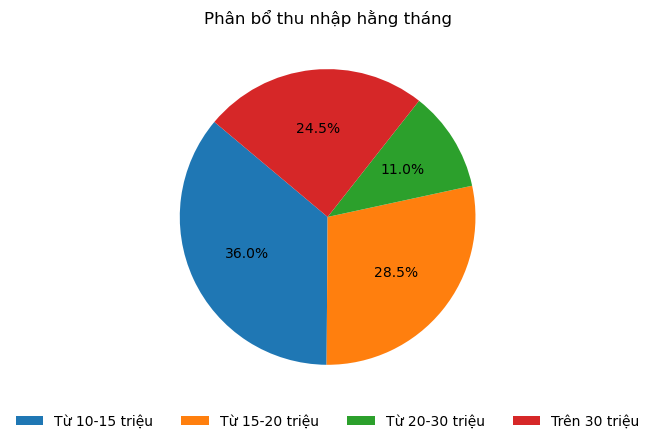

Từ 10-15 triệu: 72
Từ 15-20 triệu: 57
Từ 20-30 triệu: 22
Trên 30 triệu: 49


In [8]:
# Data to plot
sizes = apartment['Thu nhập hàng tháng'].value_counts()
sizes.index = pd.CategoricalIndex(sizes.index, categories=['Từ 10-15 triệu', 'Từ 15-20 triệu', 'Từ 20-30 triệu', 'Trên 30 triệu'], ordered=True)
sizes = sizes.sort_index()
labels = sizes.index

# Plot
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, autopct='%1.1f%%', startangle=140)

# Draw legend
plt.legend(wedges, labels, loc="upper center", bbox_to_anchor=(0.5, -0.0005), ncol=4, frameon=False)
plt.title('Phân bổ thu nhập hằng tháng')
plt.savefig('05. pie_chart_thu_nhap.png', format='png', dpi=300)  # You can change the format and dpi as needed
plt.show()

# Print quantities
for label, size in zip(sizes.index, sizes):
    print(f'{label}: {size}')

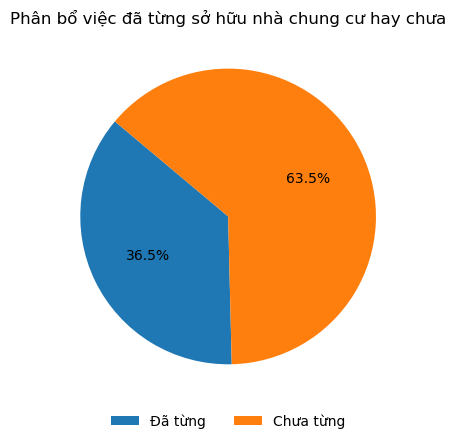

Đã từng: 73
Chưa từng: 127


In [9]:
# Data to plot
sizes = apartment['Đã từng/sở hữu nhà chung cư'].value_counts()
sizes.index = pd.CategoricalIndex(sizes.index, categories=['Đã từng', 'Chưa từng'], ordered=True)
sizes = sizes.sort_index()
labels = sizes.index

# Plot
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, autopct='%1.1f%%', startangle=140)

# Draw legend
plt.legend(wedges, labels, loc="upper center", bbox_to_anchor=(0.5, -0.0005), ncol=4, frameon=False)
plt.title('Phân bổ việc đã từng sở hữu nhà chung cư hay chưa')
plt.savefig('06. pie_chart_so_huu.png', format='png', dpi=300)  # You can change the format and dpi as needed
plt.show()

# Print quantities
for label, size in zip(sizes.index, sizes):
    print(f'{label}: {size}')

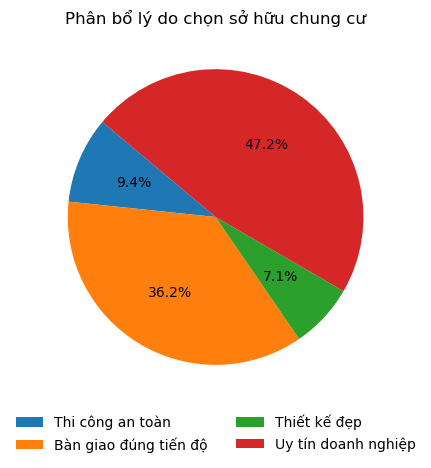

Thi công an toàn: 12
Bàn giao đúng tiến độ: 46
Thiết kế đẹp: 9
Uy tín doanh nghiệp: 60


In [10]:
# Data to plot
sizes = apartment['Lý do chọn sở hữu chung cư'].value_counts()
sizes.index = pd.CategoricalIndex(sizes.index, categories=['Thi công an toàn', 'Bàn giao đúng tiến độ', 'Thiết kế đẹp', 'Uy tín doanh nghiệp', 'Chất lượng dịch vụ bảo trì và sửa chữa'], ordered=True)
sizes = sizes.sort_index()
labels = sizes.index

# Plot
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, autopct='%1.1f%%', startangle=140)

# Draw legend
plt.legend(wedges, labels, loc="upper center", bbox_to_anchor=(0.5, -0.0005), ncol=2, frameon=False)
plt.title('Phân bổ lý do chọn sở hữu chung cư')
plt.savefig('07. pie_chart_ly_do.png', format='png', dpi=300)  # You can change the format and dpi as needed
plt.show()

# Print quantities
for label, size in zip(sizes.index, sizes):
    print(f'{label}: {size}')

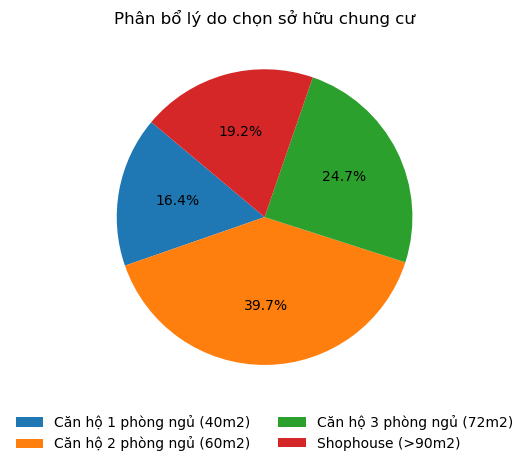

Căn hộ 1 phòng ngủ (40m2): 12
Căn hộ 2 phòng ngủ (60m2): 29
Căn hộ 3 phòng ngủ (72m2): 18
Shophouse (>90m2): 14


In [11]:
# Data to plot
sizes = apartment['Loại căn hộ muốn sở hữu'].value_counts()
sizes.index = pd.CategoricalIndex(sizes.index, categories=['Căn hộ 1 phòng ngủ (40m2)', 'Căn hộ 2 phòng ngủ (60m2)', 'Căn hộ 3 phòng ngủ (72m2)', 'Shophouse (>90m2)'], ordered=True)
sizes = sizes.sort_index()
labels = sizes.index

# Plot
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, autopct='%1.1f%%', startangle=140)

# Draw legend
plt.legend(wedges, labels, loc="upper center", bbox_to_anchor=(0.5, -0.0005), ncol=2, frameon=False)
plt.title('Phân bổ lý do chọn sở hữu chung cư')
plt.savefig('07. pie_chart_ly_do.png', format='png', dpi=300)  # You can change the format and dpi as needed
plt.show()

# Print quantities
for label, size in zip(sizes.index, sizes):
    print(f'{label}: {size}')

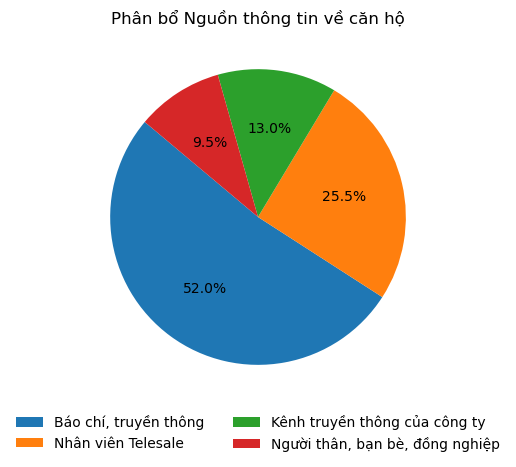

Báo chí, truyền thông: 104
Nhân viên Telesale: 51
Kênh truyền thông của công ty: 26
Người thân, bạn bè, đồng nghiệp: 19


In [12]:
# Data to plot
sizes = apartment['Nguồn thông tin về căn hộ'].value_counts()
labels = sizes.index

# Plot
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, autopct='%1.1f%%', startangle=140)

# Draw legend
plt.legend(wedges, labels, loc="upper center", bbox_to_anchor=(0.5, -0.0005), ncol=2, frameon=False)
plt.title('Phân bổ Nguồn thông tin về căn hộ')
plt.savefig('08. pie_chart_nguon.png', format='png', dpi=300)  # You can change the format and dpi as needed
plt.show()
 
# Print quantities
for label, size in zip(sizes.index, sizes):
    print(f'{label}: {size}')

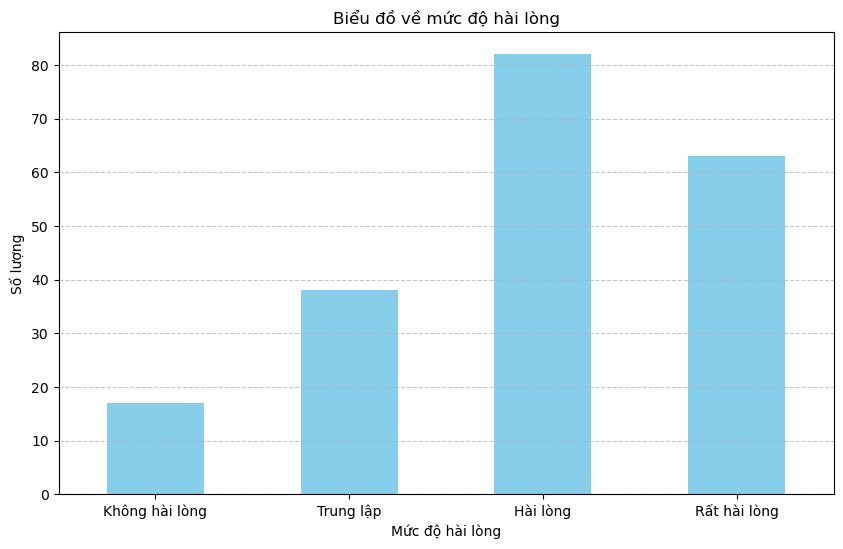

Mức độ hài lòng
Không hài lòng    17
Trung lập         38
Hài lòng          82
Rất hài lòng      63
Name: count, dtype: int64


In [13]:
# Extract the "Mức độ hài lòng" column
satisfaction_levels = apartment['Mức độ hài lòng']

# Count the occurrences of each satisfaction level
satisfaction_counts = satisfaction_levels.value_counts()

# Define the desired order for the satisfaction levels
desired_order = ['Không hài lòng', 'Trung lập', 'Hài lòng', 'Rất hài lòng']

# Reindex the satisfaction_counts to the desired order, filling missing values with 0
satisfaction_counts = satisfaction_counts.reindex(desired_order, fill_value=0)

# Plot a bar chart with the desired order
plt.figure(figsize=(10, 6))
satisfaction_counts.plot(kind='bar', color='skyblue')
plt.title('Biểu đồ về mức độ hài lòng')
plt.xlabel('Mức độ hài lòng')
plt.ylabel('Số lượng')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('10. column_chart_hai_long.png', format='png', dpi=300)  # You can change the format and dpi as needed

# Display the plot
plt.show()

# Print quantities
print(satisfaction_counts)

In [14]:
# Defining the response scale for satisfaction
satisfaction_scale = ['Khách hàng có nhận xét tốt', 'Khách hàng sẽ giới thiệu căn hộ', 'Khách hàng có ý định sở hữu']
# More biased towards 'Hài lòng' (score 4) and 'Rất hài lòng' (score 5)
satisfaction_probabilities = [0.3, 0.6, 0.1]

# Generating biased responses for satisfaction with owning a Coteccons apartment
responses = np.random.choice(satisfaction_scale, size=200, p=satisfaction_probabilities)

# Creating a DataFrame for the survey responses
df_responses_satisfaction = pd.DataFrame(responses, columns=['Mức độ hài lòng'])

# Saving the DataFrame to an Excel file
file_path_satisfaction = 'survey_responses_satisfaction_biased.xlsx'
df_responses_satisfaction.to_excel(file_path_satisfaction, index=False)

print(f"Data saved to {file_path_satisfaction}")

Data saved to survey_responses_satisfaction_biased.xlsx


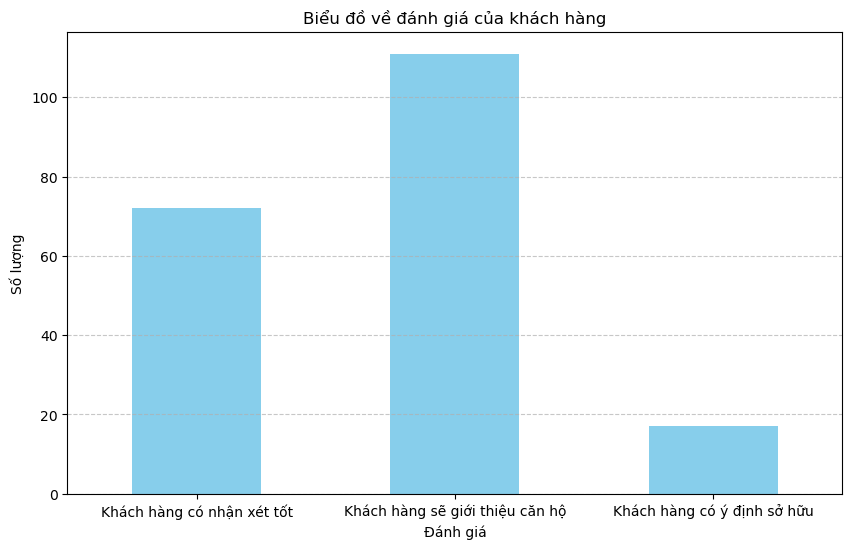

Nhận xét
Khách hàng có nhận xét tốt          72
Khách hàng sẽ giới thiệu căn hộ    111
Khách hàng có ý định sở hữu         17
Name: count, dtype: int64


In [15]:
# Extract the "Mức độ hài lòng" column
satisfaction_levels = apartment['Nhận xét']

# Count the occurrences of each satisfaction level
satisfaction_counts = satisfaction_levels.value_counts()

# Define the desired order for the satisfaction levels
desired_order = ['Khách hàng có nhận xét tốt', 'Khách hàng sẽ giới thiệu căn hộ', 'Khách hàng có ý định sở hữu']

# Reindex the satisfaction_counts to the desired order, filling missing values with 0
satisfaction_counts = satisfaction_counts.reindex(desired_order, fill_value=0)

# Plot a bar chart with the desired order
plt.figure(figsize=(10, 6))
satisfaction_counts.plot(kind='bar', color='skyblue')
plt.title('Biểu đồ về đánh giá của khách hàng')
plt.xlabel('Đánh giá')
plt.ylabel('Số lượng')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('11. column_chart_danh_gia.png', format='png', dpi=300)  # You can change the format and dpi as needed

# Display the plot
plt.show()

# Print quantities
print(satisfaction_counts)